# Predicting Student Score in Python using Linear Regression





In this module I have Predicted Student Scores on the basis of Hours they studied

@code_by: _Rutwik Deshmukh_

### 1. Importing Data and Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
print('Data Imported Successfully!')

Data Imported Successfully!


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.shape

(25, 2)

### 2. Plot of Student Score vs Hours of Study

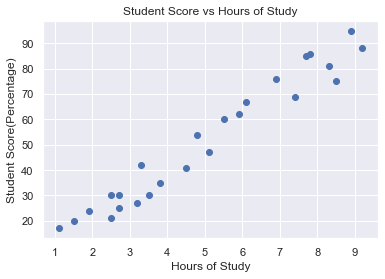

In [6]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Student Score vs Hours of Study')
plt.xlabel('Hours of Study')
plt.ylabel('Student Score(Percentage)')
plt.show()

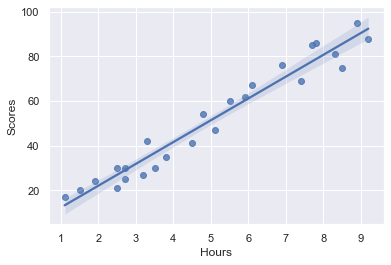

In [7]:
sns.regplot(df['Hours'],df['Scores'])

We can see that Hours of Study is Linearly Related to Scores of the Students, so we will use a Linear Regression model.

### 3. Preparing the Data

In [8]:
X = df[['Hours']]
y = df['Scores']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

### 4. Training the Linear Regression algorithm

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pred = reg.predict(X_test)

### 5. Finding the Accuracy of our model

In [12]:
from sklearn import metrics

In [13]:
accuracy = metrics.explained_variance_score(y_test, pred)
print(f'Accuracy of the model is: {accuracy}')

Accuracy of the model is: 0.9573817755260985


In [14]:
mean_absolute_error = metrics.mean_absolute_error(y_test, pred)
print(f'The mean absolute error of the model is: {mean_absolute_error}')

The mean absolute error of the model is: 4.904799258483659


In [15]:
hours = pd.DataFrame({'Hours':[9.25]})
output = reg.predict(hours[['Hours']])

### 6. Predicting the Score of a student for "9.25" hours of Study

In [16]:
print(f'For 9.25 hours of study a student is expected to score {output}%')

For 9.25 hours of study a student is expected to score [93.52871659]%


### 7. Finally Pickling the regressor

In [17]:
import pickle
pickle_out = open("regressor.pkl","wb")
pickle.dump(reg, pickle_out)
pickle_out.close()